In [1]:
import numpy as np
import yaml
import torch
import pickle

Load created data_points.pkl from that is created in the the outputs folder when running NeuroLS over the instance file in data/JSSP/jsspNxM

In [15]:
import pickle
with open("data/dt_datasets/50x202.pkl", "rb") as handle:
    data = pickle.load(handle)
print(len(data))
print(data[0])
#print(len(data[2]["observation"]))
#rtgs = [x["lowerbound"]-x["returns_to_go"] for x in data[0::36]]
#Wie genau sieht der letzte step einer observation aus
#Ist die action die action die zu dem zustand geführt hat oder die die davon abgeht
#Stellt die action mask alle aktionen dar die vom aktuellen zustand aus erreichbar sind?
#Warum nochmal die logits und probabilities im Datensatz

1000
[{'step_number': 0, 'observation': tensor([ 4.9485e+01, -5.3602e+00, -5.3675e-01, -5.9402e+00,  1.2053e+00,
         4.3081e+00,  1.3114e+01,  4.8774e+00, -3.6223e+00, -6.0685e+00,
        -7.3185e+00,  1.1729e+02, -5.8553e-01, -1.0441e+00, -2.2191e+02,
        -1.3587e+00,  3.4004e+00,  1.0857e+00, -1.6428e+01,  1.6989e+00,
        -5.6771e+00, -4.8022e-01, -1.4358e+01, -3.2670e+00,  1.1141e+01,
        -1.7588e+01, -3.2501e-01,  2.4529e+00,  9.5567e+00, -1.4020e+02,
        -7.1804e+00,  4.7678e+00,  1.6725e+02,  1.3124e+00, -5.9219e+00,
        -1.1713e+00, -6.1758e+00, -8.8919e+00, -6.9958e+00,  1.1224e+01,
         1.1789e+01,  9.3029e-01,  6.0903e+00,  1.0687e+01,  6.4728e+00,
         8.6724e+00,  1.7129e+01, -2.6894e+00,  6.9243e-02,  2.2998e+00,
         9.8880e+00,  4.2317e+00,  5.7392e+00,  7.4954e+00, -1.4878e+00,
        -1.6540e+02,  1.0518e+01,  9.3499e+00,  3.9784e+00,  1.1354e+01,
         8.7155e+00,  2.1234e+00, -4.8594e+00, -5.5083e+01,  1.7305e+00,
         1.

In [9]:
data[0]

[{'step_number': 0,
  'observation': tensor([ 9.5486e+01, -1.5946e+01,  8.3408e+00,  4.4467e-01, -5.2021e+00,
          -1.0683e+01,  8.4432e+00, -1.1969e+01,  1.4269e+01,  1.0486e+01,
           1.4561e+01,  1.7107e+02,  1.8001e+01,  1.9450e+01, -2.8743e+02,
           3.1606e+00,  1.9815e+01,  1.1213e+01, -2.9346e+01,  6.7479e+00,
          -4.4389e+01,  2.1338e+01, -1.2705e+01, -1.6388e+01,  2.4896e+01,
          -1.2831e+01, -2.0190e+01, -1.2590e-01,  5.1278e+00, -1.5338e+02,
          -2.0905e+01,  2.0716e+00,  3.6768e+02,  1.2478e+01, -7.5342e+00,
          -3.3143e-01, -9.4345e+00, -2.3712e+01, -1.2487e+01,  2.0369e+00,
           1.6064e+01,  5.8842e+00,  1.6313e+01,  3.5551e+01,  2.5485e+01,
           1.6060e+01,  9.8886e+01,  3.6370e+00, -1.1596e+01,  3.7246e+00,
           4.0581e+00, -8.3042e+00, -1.5076e+00, -2.6185e+00, -6.8023e+00,
          -1.6419e+02,  1.1102e+01,  2.9814e+01,  1.2061e+01,  1.6735e+01,
           4.0678e+00, -1.1417e+01,  7.2300e+00, -7.8872e+01,  1.

In [16]:
def calculate_returns_to_go(datapoints):
    return_to_go = 0
    return_to_go_list = []
    for datapoint in reversed(datapoints):
            return_to_go = return_to_go + datapoint.get("reward")
            datapoint['returns_to_go'] = return_to_go
            return_to_go_list.append(return_to_go)
    return_to_go_list.reverse()
    return return_to_go_list

for d in data:
    calculate_returns_to_go(d)
data[511]


[{'step_number': 51100,
  'observation': tensor([ 5.3254e+01, -7.9113e+00, -9.2592e-02, -4.9046e+00, -3.0288e-02,
           3.5004e+00,  1.0866e+01,  2.9298e+00, -1.4529e+00, -6.1052e+00,
          -6.6738e+00,  1.1987e+02,  1.2835e+00,  9.1958e-01, -2.2422e+02,
           1.2199e+00,  4.1230e+00,  3.7912e+00, -1.6804e+01,  2.6685e+00,
          -8.7804e+00,  2.1907e+00, -1.4418e+01, -5.3821e+00,  1.2613e+01,
          -1.7864e+01, -2.2831e+00,  2.0477e+00,  1.0145e+01, -1.3919e+02,
          -8.1314e+00,  4.2457e+00,  1.7414e+02,  2.2769e+00, -4.9319e+00,
          -5.6510e-02, -7.6515e+00, -1.0337e+01, -9.2194e+00,  9.8870e+00,
           1.3393e+01,  3.2599e-01,  8.2159e+00,  1.2402e+01,  8.3810e+00,
           8.2075e+00,  1.9842e+01, -1.8245e+00, -3.2512e-01,  1.0768e+00,
           8.8582e+00,  3.0843e+00,  4.6371e+00,  5.0325e+00, -1.2977e+00,
          -1.6091e+02,  1.0953e+01,  1.1468e+01,  5.4278e+00,  1.2197e+01,
           8.1887e+00,  1.3838e+00, -3.1477e+00, -5.6317e+01,

In [13]:
data[0]

[{'step_number': 0,
  'observation': tensor([ 9.8362e+01, -1.8523e+01,  8.5020e+00,  6.4863e-01, -5.4031e+00,
          -1.0857e+01,  9.2389e+00, -1.1614e+01,  1.6472e+01,  1.0994e+01,
           1.5654e+01,  1.7569e+02,  2.0157e+01,  2.0871e+01, -2.9386e+02,
           4.5419e+00,  2.1676e+01,  1.0185e+01, -2.9890e+01,  7.7648e+00,
          -4.6058e+01,  2.1795e+01, -1.3161e+01, -1.8948e+01,  2.6197e+01,
          -1.3233e+01, -2.2728e+01, -2.1754e-01,  5.3571e+00, -1.5562e+02,
          -2.2102e+01,  9.1338e-01,  3.8486e+02,  1.3527e+01, -7.5614e+00,
           7.3223e-01, -9.4076e+00, -2.5520e+01, -1.3271e+01,  1.6489e+00,
           1.6820e+01,  7.0204e+00,  1.8207e+01,  3.8098e+01,  2.7455e+01,
           1.6174e+01,  1.0603e+02,  4.0468e+00, -1.3129e+01,  2.5281e+00,
           3.7426e+00, -8.1969e+00, -2.8935e+00, -1.6059e+00, -6.6144e+00,
          -1.6714e+02,  1.0583e+01,  3.0548e+01,  1.2919e+01,  1.6264e+01,
           3.5230e+00, -1.1280e+01,  8.3640e+00, -8.0374e+01,  6.

In [17]:
flattened_list = []
for i in range(len(data)):
    for d in data[i]:
        d["step_number"] = d["step_number"] - 100*i  # 200 wegen 200 iterationen
        d["observation"] = d["observation"].numpy()
    flattened_list.extend(data[i])


In [21]:
flattened_list[100]

{'step_number': 0,
 'observation': array([ 6.3803558e+01, -8.5998716e+00,  4.7722020e+00,  1.9614210e+00,
        -1.3542852e+00, -4.1749001e-01, -4.1624541e+00, -6.7137856e+00,
        -4.7337532e-02, -1.1667194e+00, -3.7494583e+00,  1.2469418e+02,
         3.5037184e+00,  8.0730200e+00, -2.2607608e+02,  7.3766470e+00,
         4.3677540e+00,  2.1321835e+01, -2.1514328e+01,  2.5538020e+00,
        -2.0018227e+01,  1.4103215e+01, -9.3071423e+00, -6.7564678e+00,
         1.2816650e+01, -1.1563641e+01, -3.3808002e+00,  4.0642147e+00,
         1.0828587e+01, -1.3178098e+02, -7.9622536e+00,  3.4127305e+00,
         1.5832150e+02,  3.7020540e+00, -5.7778282e+00,  1.5629148e+00,
        -9.7294865e+00, -1.5285494e+01, -1.4355095e+01,  3.0910745e+00,
         1.5507973e+01, -2.4124727e+00,  7.9960647e+00,  1.0984241e+01,
         6.8886118e+00,  7.0611014e+00,  5.3402252e+00,  4.6029944e+00,
        -3.5043907e-01, -2.0741754e+00,  4.1568694e+00, -3.3659487e+00,
         5.0193839e+00, -1.045

In [22]:
with open('data/dt_datasets/50x20_100it_1000inst_flat.pkl', 'wb') as f:
    pickle.dump(flattened_list, f)

In [217]:
len(dict)

0

In [36]:
from src.agents.reinforcement_learning.ppo_masked import MaskedPPO
from sklearn.model_selection import train_test_split
from src.environments.environment_loader import EnvironmentLoader
from src.agents.train_test_utility_functions import load_data
import torch
with open(CONFIG_PATH, mode='r') as open_file:
    config = yaml.safe_load(open_file)
config['wandb_mode'] = 0
config = {key:value['value'] for (key, value) in config.items() if type(value)==dict}
data = load_data(config) # List[List[Task]]
np.random.seed(config['seed'])
# train/test/validation data split
# todo: do not use the test_data for training. If necessary, we generate more training data!
split_random_seed = config['seed'] if not config.get('overwrite_split_seed', False) else 1111
train_data, test_data = train_test_split(
    data, train_size=config.get('train_test_split'), random_state=split_random_seed)
test_data, val_data = train_test_split(
    test_data, train_size=config.get('test_validation_split'), random_state=split_random_seed)



In [75]:
lower_bounds = []
environment, _ = EnvironmentLoader.load(config, data=data)

len(environment.reset())

57

In [3]:
from StateActionReturnDataset import StateActionReturnDataset
sd = StateActionReturnDataset(data, 6)

In [16]:
states, actions, returns_to_go, timesteps, targets = sd.__getitem__(85)

In [15]:
returns_to_go

tensor([[0.0404],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]], dtype=torch.float64)

In [10]:
l=[1,2,3]
c = [4,5,6]

l.extend(c)
l

[1, 2, 3, 4, 5, 6]

In [8]:
abs(5-3)

2

-6


0

In [16]:
import numpy as np
action = [1,1,3,4,0]
a = (np.asarray(action) >=0).sum()
a

5

In [9]:
def levenshtein_distance(list1, list2):
    m = len(list1)
    n = len(list2)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i

    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if list1[i - 1] == list2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[m][n]

In [5]:
import numpy
a = np.arange(0.8,1.25,0.05)

In [6]:
a

array([0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ])

In [7]:
hash(a)

TypeError: unhashable type: 'numpy.ndarray'

In [12]:
test = np.loadtxt("117.55554962158203.txt").astype(int)

In [14]:
test.flatten()

array([211,  47, 151,  18,  32, 171,  67,  99, 118, 135, 208, 194,  14,
       149,  90, 197,  20, 170,  68,  39,  85, 117, 191, 134,  57, 147,
       162,  12, 220, 104,   2, 213, 152,  19, 110,  50, 202, 173, 131,
        71, 146, 101, 193,  89,  43,  61, 137, 154, 184, 169,   6,  35,
        23, 130,  86,  98, 204, 120, 222,  59, 212, 109,  79,   7,  95,
        53,  70, 132, 175, 144, 192, 206,  42,  30, 165, 181, 214, 201,
       115, 174,  40,  55, 133,  11, 161,  87,  27,  74, 103, 148,  76,
       182, 108, 121, 167, 139,  33,  65,  94, 156,  52, 215,   9, 203,
        28,  48,  92, 183, 124, 155,  82, 142,  10,  72,  26, 218, 119,
       179,  45, 209, 136,  80, 113, 128,  51,  24,  69,  38, 188, 158,
       178, 207, 221, 105,  15, 107,  63, 138, 122,  83,  36, 157,  97,
       189, 205,  58,  13,  29, 224, 180, 106,  46,  77, 198,   4, 140,
       129, 187,  25, 176, 217,  73, 102,  44, 163, 196,  62,  31,  78,
       111, 125,  22, 185,   8,  96, 143, 159, 177, 219,  60,  1

In [15]:
test

array([[211,  47, 151,  18,  32, 171,  67,  99, 118, 135, 208, 194,  14,
        149,  90],
       [197,  20, 170,  68,  39,  85, 117, 191, 134,  57, 147, 162,  12,
        220, 104],
       [  2, 213, 152,  19, 110,  50, 202, 173, 131,  71, 146, 101, 193,
         89,  43],
       [ 61, 137, 154, 184, 169,   6,  35,  23, 130,  86,  98, 204, 120,
        222,  59],
       [212, 109,  79,   7,  95,  53,  70, 132, 175, 144, 192, 206,  42,
         30, 165],
       [181, 214, 201, 115, 174,  40,  55, 133,  11, 161,  87,  27,  74,
        103, 148],
       [ 76, 182, 108, 121, 167, 139,  33,  65,  94, 156,  52, 215,   9,
        203,  28],
       [ 48,  92, 183, 124, 155,  82, 142,  10,  72,  26, 218, 119, 179,
         45, 209],
       [136,  80, 113, 128,  51,  24,  69,  38, 188, 158, 178, 207, 221,
        105,  15],
       [107,  63, 138, 122,  83,  36, 157,  97, 189, 205,  58,  13,  29,
        224, 180],
       [106,  46,  77, 198,   4, 140, 129, 187,  25, 176, 217,  73, 102,
       

In [4]:
l = [1,1,3,1]
i = [0 + x for x in l]

In [5]:
i

[1, 1, 3, 1]

In [8]:
import numpy as np
np.zeros(15*15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
makespans = np.arange(15, 25)
mdt = np.arange(10,14)
time = np.arange(25)



In [ ]:
import yaml
import pickle
import torch as T
import numpy as np
from pathlib import Path
from src.agents.decision_transformer.mingpt import dt_model

from typing import List

from src.environments.observation_parser import ObservationParser
from src.agents.reinforcement_learning.ppo_masked import MaskedPPO
from sklearn.model_selection import train_test_split
from src.environments.environment_loader import EnvironmentLoader
from src.agents.train_test_utility_functions import load_data
###CREATE GANT CHART
CONFIG_PATH = 'base_networks/6x6_agent_mppo_config.yaml'
INSTANCES_PATH = '../../../data/instances/jssp/config_job3_task4_tools0.pkl'
with open(CONFIG_PATH, mode='r') as open_file:
    config = yaml.safe_load(open_file)
config['wandb_mode'] = 0

# parse config from wandb to our format
config = {key:value['value'] for (key, value) in config.items() if type(value)==dict}

# load data
data = load_data(config)
type(data[0][0])





import src.agents.solver.solver as Solver
from src.visuals_generator.gantt_chart import GanttChartPlotter
solver = Solver.OrToolSolver()
data_points = []
print(len(data))
for instance in data:
    returns_to_go = []
    current_instance = []
    hash = instance[0].instance_hash
    environment, _ = EnvironmentLoader.load(config, data=[instance])
    solved, optimal_makespan = solver.optimize(instance)
    solved_list = [element for x in solved for element in solved[x]]
    sorted_by_start_time = sorted(solved_list, key=lambda task: task.start)
    actions = [task.job for task in sorted_by_start_time]
    plot = solver.parse_to_plottable_format(instance, solved)

    for action in actions:
        observation = environment.state_obs
        action_mask = environment.get_action_mask()
        step_number = environment.num_steps
        makespan = environment.makespan
        _, reward, done, infos = environment.step(action)
    if done:
        gp = GanttChartPlotter()
        gp.get_gantt_chart_image_and_save(plot, show_image=True)


AssertionError: Missing file at path: C:\Users\fabia\OneDrive\MyUni\Masterarbeit\scheduling-sandbox\data\instances\jssp\config_job3_task3_tools0.pkl

2


In [3]:
x1 = 1306
x2 = 1301
sp = ((39)*sd1 +39*2sd2) / (38)

Saft


In [26]:
import numpy as np
x1 =1301
x2 =1306
sd1 = 72.24
sd2 = 76.45
n = 40
#ki = mean+ 1.684 * (sd/np.sqrt(n))

x1 = 1306
x2 = 1301
sp = ((39)*sd1 +39*2*sd2) / (38)

ci = (x1-x2) - 1.684 * np.sqrt((sp/40)+(sp/40))

In [27]:
ci

-0.7239248787964767

In [5]:
with open("data/15x15_vary_rtg.pkl", "rb") as handle:
    varied_rtg = pickle.load(handle)

In [3]:
test

{0.25: 1300.0,
 0.3: 1302.0,
 0.35: 1300.0,
 0.39999999999999997: 1301.0,
 0.44999999999999996: 1306.0,
 0.49999999999999994: 1302.0,
 0.5499999999999999: 1302.0,
 0.5999999999999999: 1305.0,
 0.6499999999999999: 1301.0,
 0.7: 1299.0,
 0.7499999999999999: nan,
 0.7999999999999998: 1302.0,
 0.8499999999999999: 1303.0,
 0.8999999999999999: 1301.0,
 0.9499999999999998: 1304.0,
 0.9999999999999998: 1301.0,
 1.0499999999999998: 1299.0,
 1.0999999999999999: 1300.0,
 1.15: 1301.0,
 1.1999999999999997: 1300.0,
 1.2499999999999998: 1303.0,
 1.2999999999999998: 1302.0,
 1.3499999999999996: 1300.0,
 1.3999999999999997: 1300.0,
 1.4499999999999997: 1302.0,
 1.4999999999999998: 1299.0,
 1.5499999999999998: 1304.0,
 1.5999999999999996: 1306.0,
 1.6499999999999997: 1304.0,
 1.6999999999999997: 1301.0,
 1.7499999999999996: 1299.0}

In [6]:
for key, value in varied_rtg.items():
    varied_rtg[key] = {'mean': value, 'std': None}
del varied_rtg[0.7499999999999999]
# Print the updated dictionary
for key, value in varied_rtg.items():
    print(f'{key}: {value}')


0.25: {'mean': 1300.0, 'std': None}
0.3: {'mean': 1302.0, 'std': None}
0.35: {'mean': 1300.0, 'std': None}
0.39999999999999997: {'mean': 1301.0, 'std': None}
0.44999999999999996: {'mean': 1306.0, 'std': None}
0.49999999999999994: {'mean': 1302.0, 'std': None}
0.5499999999999999: {'mean': 1302.0, 'std': None}
0.5999999999999999: {'mean': 1305.0, 'std': None}
0.6499999999999999: {'mean': 1301.0, 'std': None}
0.7: {'mean': 1299.0, 'std': None}
0.7999999999999998: {'mean': 1302.0, 'std': None}
0.8499999999999999: {'mean': 1303.0, 'std': None}
0.8999999999999999: {'mean': 1301.0, 'std': None}
0.9499999999999998: {'mean': 1304.0, 'std': None}
0.9999999999999998: {'mean': 1301.0, 'std': None}
1.0499999999999998: {'mean': 1299.0, 'std': None}
1.0999999999999999: {'mean': 1300.0, 'std': None}
1.15: {'mean': 1301.0, 'std': None}
1.1999999999999997: {'mean': 1300.0, 'std': None}
1.2499999999999998: {'mean': 1303.0, 'std': None}
1.2999999999999998: {'mean': 1302.0, 'std': None}
1.3499999999999996:

In [7]:
len(varied_rtg)

30

In [8]:
import re

def extract_cost_std(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    cost_std_values = []

    for line in lines:
        # Extract 'cost_std' value using regular expression
        match = re.search(r"'cost_std': (\d+\.\d+)", line)
        if match:
            if float(match.group(1)) > 0:
                cost_std_values.append(float(match.group(1)))

    return cost_std_values

# Replace 'your_file_path.txt' with the actual path to your text file
file_path = 'data/lines.txt'
cost_std_values = extract_cost_std(file_path)

# Print the extracted cost_std values
for i, cost_std in enumerate(cost_std_values, start=1):
    print(f'Line {i}: {cost_std}')

Line 1: 70.3046305942261
Line 2: 71.71908889867493
Line 3: 72.20916476984559
Line 4: 71.41387786342176
Line 5: 72.68117674982545
Line 6: 73.11085479275177
Line 7: 71.38718647442606
Line 8: 71.35690218937042
Line 9: 75.58630567841506
Line 10: 70.069687101543
Line 11: 74.53437067560799
Line 12: 72.4840247619533
Line 13: 73.9373608813516
Line 14: 72.99705427182923
Line 15: 69.6248073360037
Line 16: 72.53082854618083
Line 17: 69.02584625359229
Line 18: 68.68274591991889
Line 19: 72.57300507721254
Line 20: 69.53869382601246
Line 21: 73.68110716493332
Line 22: 75.68558346624752
Line 23: 68.43935391135253
Line 24: 70.81080295959569
Line 25: 71.19199367792578
Line 26: 76.78717270447851
Line 27: 73.64081690566587
Line 28: 71.9468376326889
Line 29: 70.67532725341974
Line 30: 74.25137296423699


In [9]:

counter = 0
for key, value in varied_rtg.items():
    varied_rtg[key]["std"] = cost_std_values[counter]
    counter +=1
for key, value in varied_rtg.items():
    print(f'{key}: {value}')


0.25: {'mean': 1300.0, 'std': 70.3046305942261}
0.3: {'mean': 1302.0, 'std': 71.71908889867493}
0.35: {'mean': 1300.0, 'std': 72.20916476984559}
0.39999999999999997: {'mean': 1301.0, 'std': 71.41387786342176}
0.44999999999999996: {'mean': 1306.0, 'std': 72.68117674982545}
0.49999999999999994: {'mean': 1302.0, 'std': 73.11085479275177}
0.5499999999999999: {'mean': 1302.0, 'std': 71.38718647442606}
0.5999999999999999: {'mean': 1305.0, 'std': 71.35690218937042}
0.6499999999999999: {'mean': 1301.0, 'std': 75.58630567841506}
0.7: {'mean': 1299.0, 'std': 70.069687101543}
0.7999999999999998: {'mean': 1302.0, 'std': 74.53437067560799}
0.8499999999999999: {'mean': 1303.0, 'std': 72.4840247619533}
0.8999999999999999: {'mean': 1301.0, 'std': 73.9373608813516}
0.9499999999999998: {'mean': 1304.0, 'std': 72.99705427182923}
0.9999999999999998: {'mean': 1301.0, 'std': 69.6248073360037}
1.0499999999999998: {'mean': 1299.0, 'std': 72.53082854618083}
1.0999999999999999: {'mean': 1300.0, 'std': 69.025846

In [10]:
import scipy.stats as stats

for key, value in varied_rtg.items():
    # Given values
    mean = varied_rtg[key]["mean"]
    std = varied_rtg[key]["std"]
    N = 100  # Replace with your sample size

    # Confidence level (e.g., 95% confidence interval)
    confidence_level = 0.95

    # Calculate standard error of the mean (SEM)
    sem = std / (N**0.5)

    # Calculate the margin of error
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, N - 1) * sem

    # Calculate the confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    varied_rtg[key]["lower_bound"] = lower_bound
    varied_rtg[key]["upper_bound"] = upper_bound


# Print the confidence interval
for key, value in varied_rtg.items():
    print(f'{key}: {value}')

0.25: {'mean': 1300.0, 'std': 70.3046305942261, 'lower_bound': 1286.050036020538, 'upper_bound': 1313.949963979462}
0.3: {'mean': 1302.0, 'std': 71.71908889867493, 'lower_bound': 1287.7693768060492, 'upper_bound': 1316.2306231939508}
0.35: {'mean': 1300.0, 'std': 72.20916476984559, 'lower_bound': 1285.672135120939, 'upper_bound': 1314.327864879061}
0.39999999999999997: {'mean': 1301.0, 'std': 71.41387786342176, 'lower_bound': 1286.8299372970428, 'upper_bound': 1315.1700627029572}
0.44999999999999996: {'mean': 1306.0, 'std': 72.68117674982545, 'lower_bound': 1291.5784777037397, 'upper_bound': 1320.4215222962603}
0.49999999999999994: {'mean': 1302.0, 'std': 73.11085479275177, 'lower_bound': 1287.4932202580933, 'upper_bound': 1316.5067797419067}
0.5499999999999999: {'mean': 1302.0, 'std': 71.38718647442606, 'lower_bound': 1287.8352334476933, 'upper_bound': 1316.1647665523067}
0.5999999999999999: {'mean': 1305.0, 'std': 71.35690218937042, 'lower_bound': 1290.8412425068705, 'upper_bound': 1

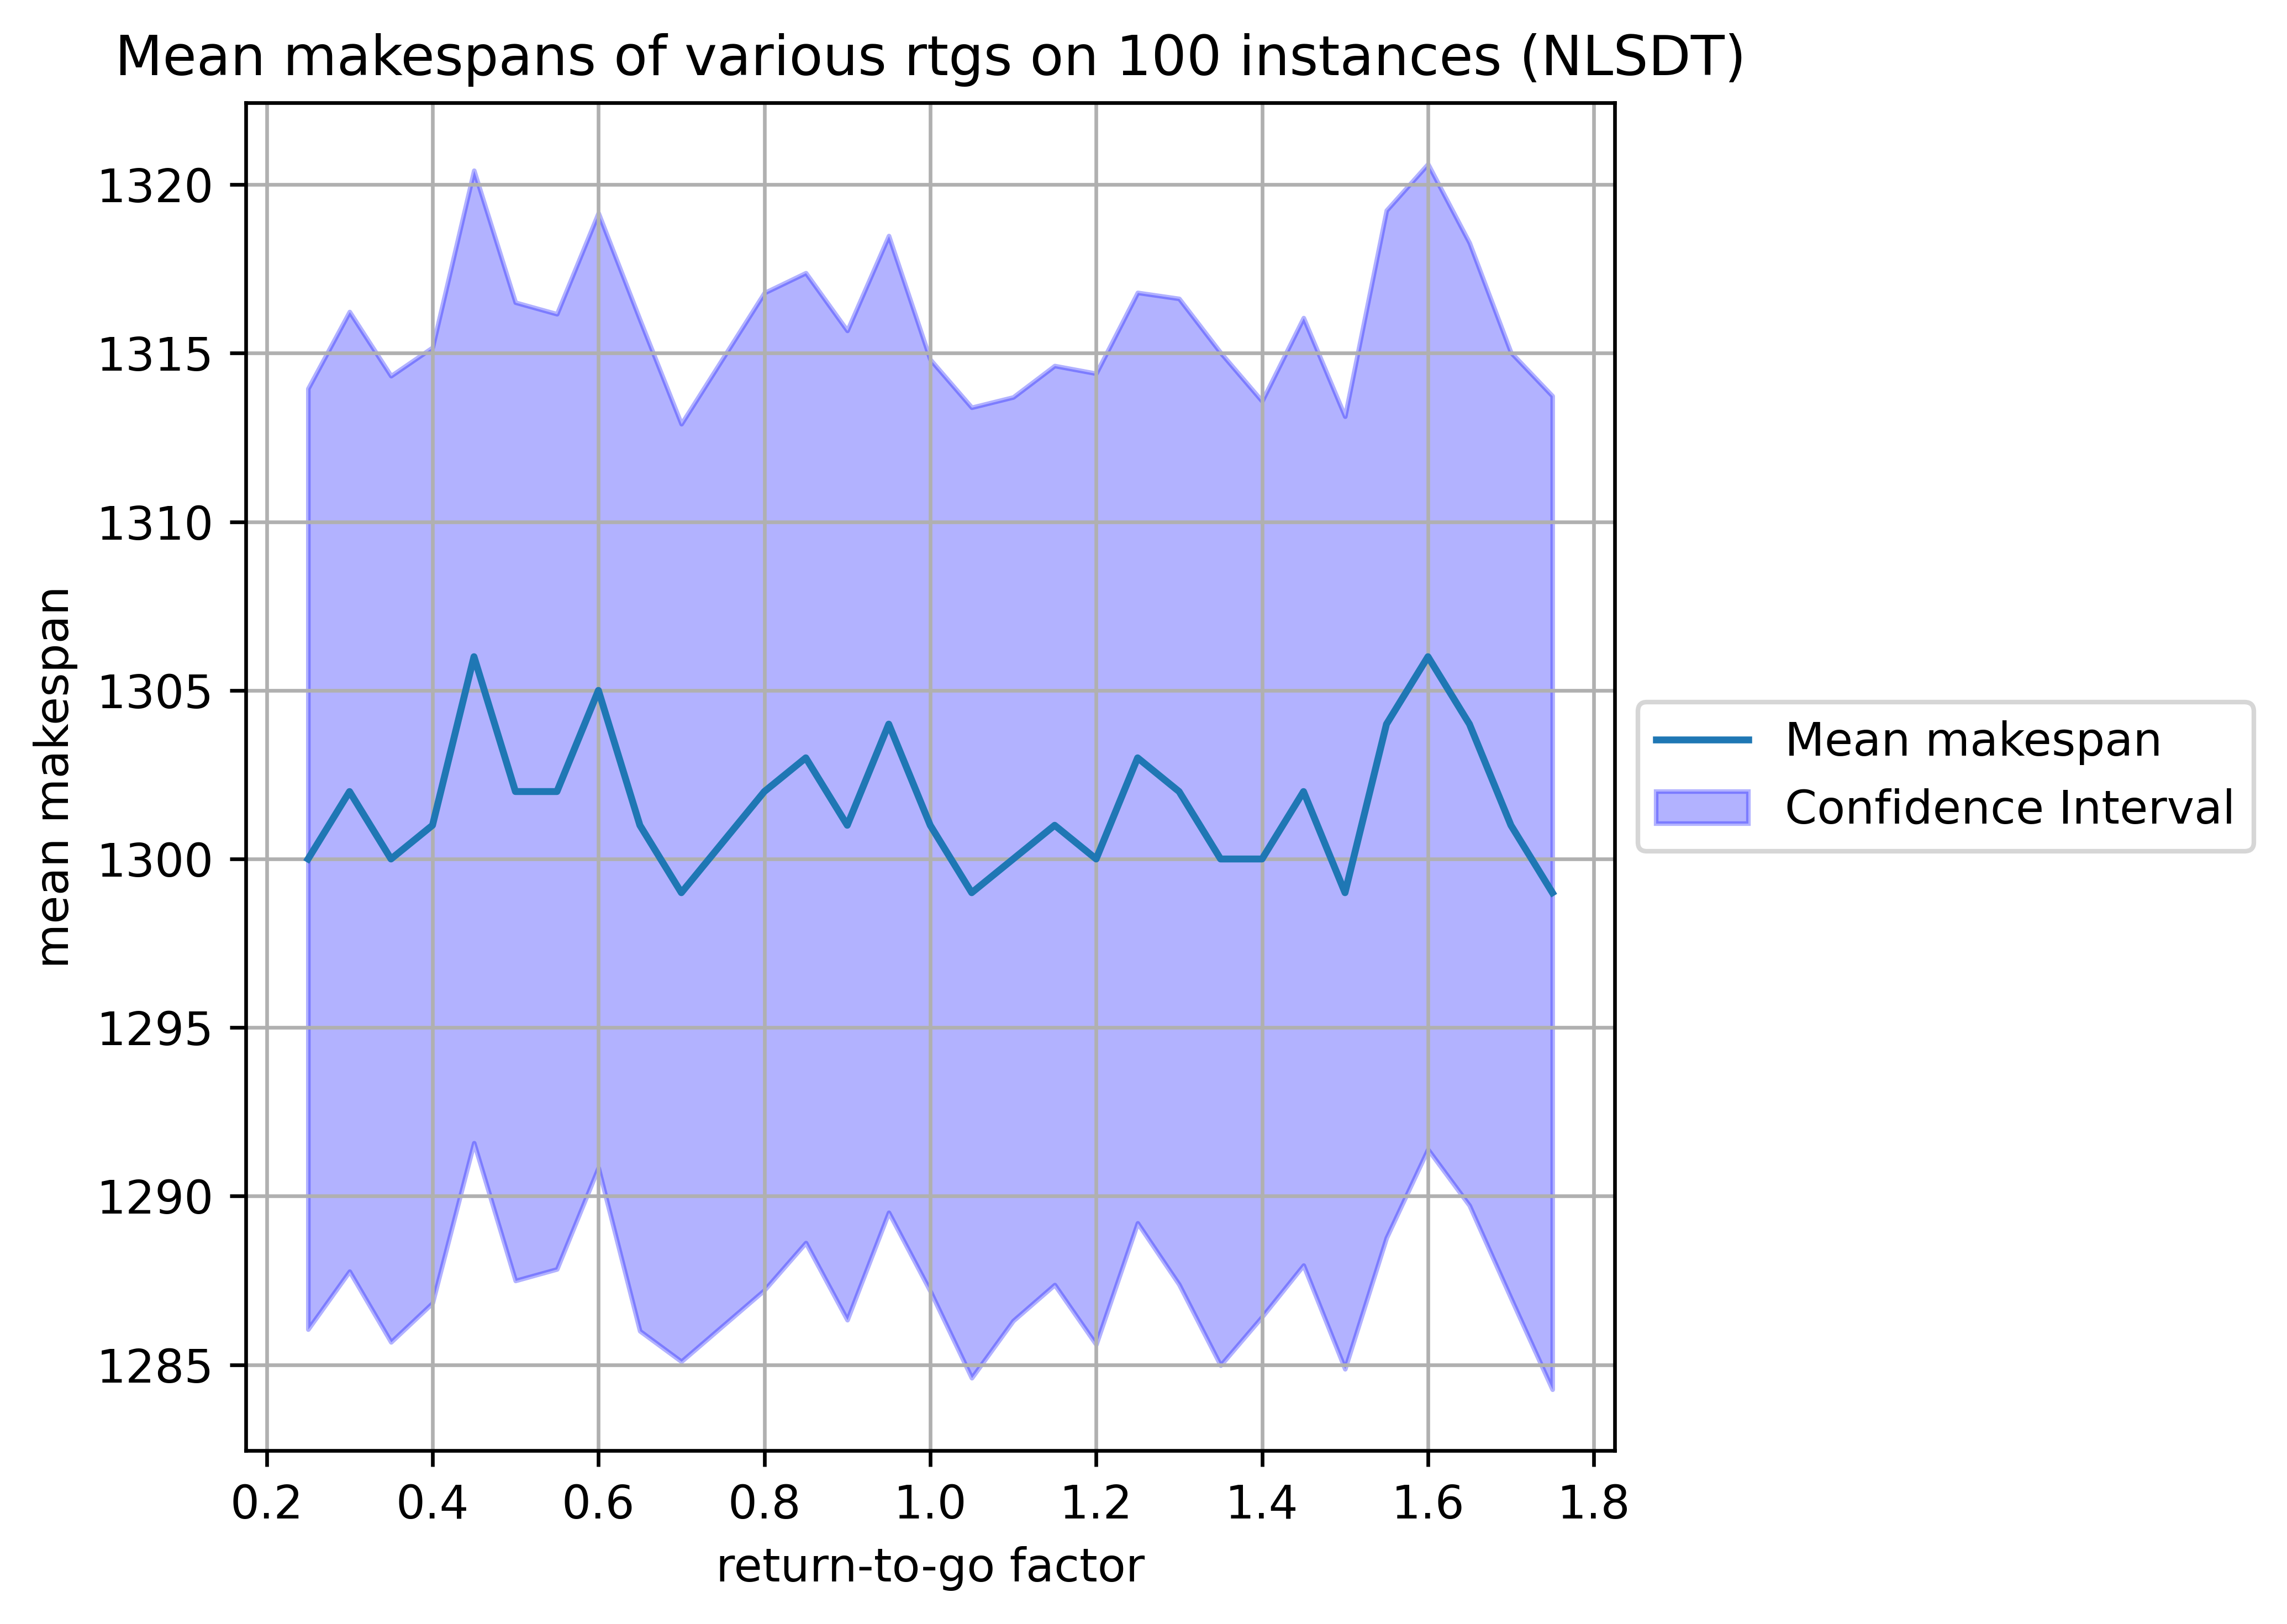

In [70]:
import matplotlib.pyplot as plt
keys = list(varied_rtg.keys())
means = [entry['mean'] for entry in varied_rtg.values()]
lower_bounds = [entry['lower_bound'] for entry in varied_rtg.values()]
upper_bounds = [entry['upper_bound'] for entry in varied_rtg.values()]
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["figure.figsize"] = (7, 5)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
# Plotting the means with error bars
plt.plot(keys, means, label='Mean makespan')

# Filling the area between the upper and lower bounds
plt.fill_between(keys, lower_bounds, upper_bounds, color='blue', alpha=0.3, label='Confidence Interval')

# Adding labels and title
plt.xlabel('return-to-go factor')
plt.ylabel('mean makespan')
plt.title('Mean makespans of various rtgs on 100 instances (NLSDT)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)

# Show the plot

plt.savefig("15x15_conf.png")
plt.show()

In [11]:
from scipy.stats import t
data1 = varied_rtg[0.7] # Replace with actual data
data2 = varied_rtg[1.5999999999999996]  # Replace with actual data

# Calculate sample statistics
mean1, mean2 = data1["mean"], data2["mean"]
std1, std2 = data1["std"], data2["std"]
n1, n2 = 100, 100

# Calculate the standard error of the difference
standard_error_diff = np.sqrt(((n1-1)*std1**2 + (n2-1*std2**2)) / (n1+n2-2))

# Choose the desired confidence level and calculate the t critical value
confidence_level = 0.95
degrees_of_freedom = n1 + n2 - 2
t_critical = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_critical * standard_error_diff

# Calculate the confidence interval
confidence_interval = (mean1 - mean2 - margin_of_error, mean1 - mean2 + margin_of_error)
rint

In [29]:
print(t.ppf((1 + confidence_level) / 2, degrees_of_freedom))

1.9720174778338955


In [143]:
(mean1-mean2) +\
t_critical*np.sqrt((std1**2/n1) + std2**2/n2)

13.04556587330169

In [34]:
def pooled_variance(n1, S1_squared, n2, S2_squared):
    numerator = (n1 - 1) * S1_squared + (n2 - 1) * S2_squared
    denominator = n1 + n2 - 2
    pooled_variance_result = numerator / denominator
    return pooled_variance_result

# Example usage:
n1 = 100  # size of sample 1
S1_squared = std1**2 # variance of sample 1
n2 = 100  # size of sample 2
S2_squared = std2**2 # variance of sample 2

result = pooled_variance(n1, S1_squared, n2, S2_squared)
print(f"Pooled Variance: {result}")

Pooled Variance: 5166.365482520973


In [40]:
(1299 - 1306)+1.97*np.sqrt(result*((1/100) + (1/100) ))

13.025058202719734

In [111]:
sp

49.27470790189457

In [107]:
t_critical = t.ppf((1 + 0.95) / 2, 98)

In [108]:
t_critical

1.984467454426692

In [148]:
s2 = (99 * std1 + 99 * std2) / (198)

In [137]:
s2d =

1306.0

In [141]:
std2

73.64081690566587